In [217]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [218]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [219]:
!wget $data -O data-week-3.csv


#wget - Linux ve Unix tabanlı sistemlerde internet üzerinden veri indirmeye yarayan bir komuttur

# $ data bir dosya yolunu veya URL'yi temsil edebiliyor olabilir. $ sembolü genellikle bir değişken adını belirtmek için kullanılır.

# -O: bu bir komut satırı seçeneğidir ve indirilen dosyanın kaydedileceği yer ve adı belirlemek için kullanılır

# data-week-3.csv : dosyanın ismi nasıl kayıt edileceğidir.

--2023-08-10 12:20:59--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  1.43MB/s    in 0.7s    

2023-08-10 12:21:00 (1.43 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [220]:
data=pd.read_csv("data-week-3.csv")

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [222]:
#Feature'ları görme..

data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [223]:
# Kolon isimlerini düzenleme

data.columns = data.columns.str.lower().str.replace(
    " ", "_")  # Kolon isimlerini daha düzgün hale getirme

# Kategorik sutünları bulma
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)

# Kategorik sutunların isimlerini düzenleme
for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ', '_')

In [224]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [225]:
data.nunique()

customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [226]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

* Total charges bir numeric kolon olmasına rağmen kolon tipi object formatında, bunun değiştirilmesi gerekiyor.

* Ayrıca SeniorCitizien kategorik bir değişken olmasına rağmen int tipinde bu yüzden onu da değiştirmemiz gerekiyor. (kolon binary tipinde kategorik)

In [227]:
tc=data.totalcharges=pd.to_numeric(data.totalcharges,errors="coerce")


# data[tc.isnull()][["totalcharges"]]
#Bazı Nan değerler ile doldurur. "coerce "

In [228]:
#NaN değerleri 0 ile doldurma

data["totalcharges"]=data["totalcharges"].fillna(0)

In [229]:
data.churn.head(7)

0     no
1     no
2    yes
3     no
4    yes
5    yes
6     no
Name: churn, dtype: object

In [230]:
#Kolon tipini değiştirme


mapping={"yes":1,"no":0}

data["churn"]=data["churn"].map(mapping)


data.churn.head(4)

0    0
1    0
2    1
3    0
Name: churn, dtype: int64

## Train-Test-Validation Set


In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [233]:
#Test-Train
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)


In [234]:
#Train-Validation

X_train, X_val, y_train, y_val =train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)

In [235]:
len(X_train),len(X_test),len(X_val)

(4225, 1409, 1409)

In [236]:
len(y_train),len(y_test),len(y_val)

(4225, 1409, 1409)

In [237]:
#Karmaşık indexler yerine indexleri sıfırlama
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

## EDA

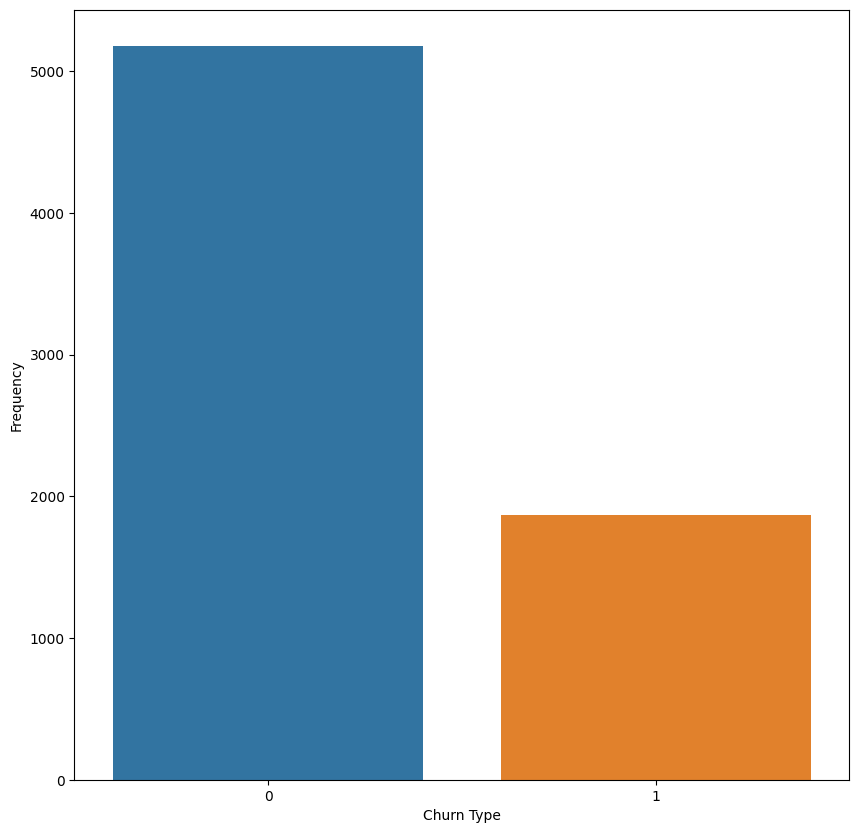

In [238]:
data_churn=data["churn"].value_counts()

plt.figure(figsize=(10, 10))

sns.barplot(data, x=data_churn.index,y=data_churn.values)


plt.xlabel("Churn Type")
plt.ylabel("Frequency")


plt.show()

In [239]:
#Toplam dağılıma göre müşterilerin dağılımını anlama

global_churn_rate=data.churn.mean()

round(global_churn_rate,2)

0.27

* Müşterilerin genel ortalaması 0.27'dir. Yani alakalı şirketin müşterileri kalma yönelimindedir.

In [240]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [241]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [242]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [243]:
# Categorical verileri kontrol etme
data[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [244]:
# Numeric verileri kontrol etme

data[numerical].nunique()

tenure              73
monthlycharges    1585
totalcharges      6531
dtype: int64

## Feature importance: Ayrılma oranı ve risk oranı

Özellik seçilimi de bir EDA parçasıdır. İlgili datayla ilgilenirken şu aşamalara değineceğiz.

    * Churn rate
    * Risk ratio
    * Mutual information - later


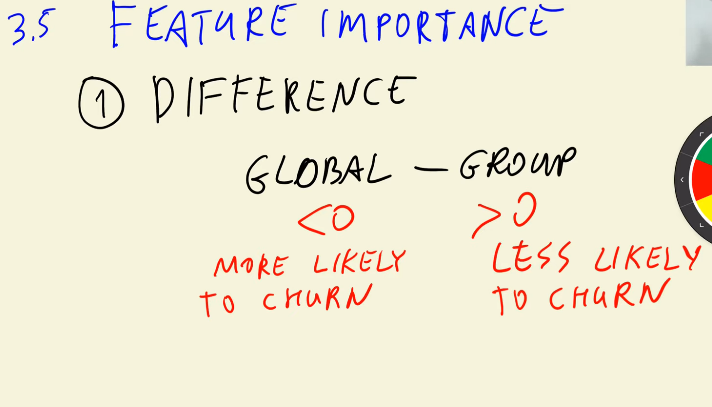

In [245]:
#Örneğin cinsiyetlere göre churn rate'ini inceleyeceğiz.


churn_female = data[data.gender == 'female'].churn.mean()
churn_female

0.26920871559633025

In [246]:
#Erkeğe göre
churn_male = data[data.gender == 'male'].churn.mean()
churn_male

0.2616033755274262

In [247]:
global_churn_rate=data.churn.mean()
global_churn_rate

0.2653698707936959

In [248]:
global_churn_rate - churn_female

-0.003838844802634356

In [249]:
global_churn_rate - churn_male

0.0037664952662697093

In [250]:
# Şimdi de partner kolonuna geçelim..

partner_no = data[data.partner == "no"].churn.mean()

partner_no

0.32957978577313923

In [251]:
# Şimdi de partner kolonuna geçelim..

partner_yes = data[data.partner == "yes"].churn.mean()

partner_yes

0.1966490299823633

In [252]:
global_churn_rate - partner_yes

0.06872084081133259

In [253]:
global_churn_rate - partner_no

-0.06420991497944334

Yorumlar : 

* Hedef sutunumuz (target) churn olduğu için diğer sutünlarla ilişkilerine bakıyoruz ;

    * Cinsiyet genel ortalamanın çok üstünde olmadığı için churn'a etkisi az olarak nitelendirebilirken, 

    * Partner olup-olmama ortalamaya değer arasındaki fark çok olduğu için, churn'e etkisi etki edebilir diye yorumlayabiliriz.

### RISK RATIO

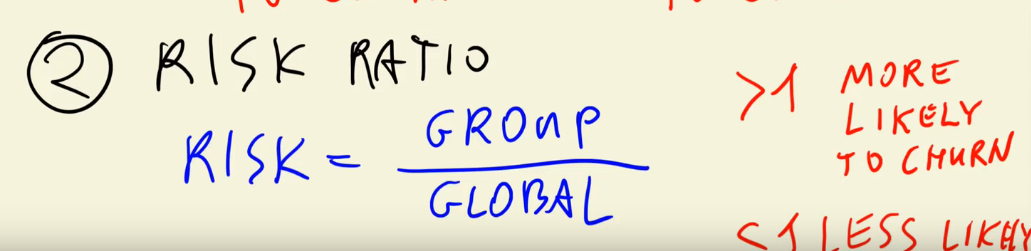

In [254]:
partner_no/global_churn_rate

1.241963847619165

In [255]:
partner_yes/global_churn_rate

0.7410375164075894

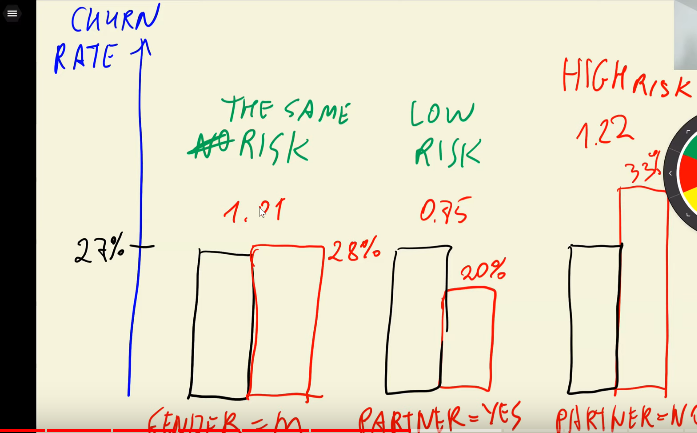

* Bunları teker teker yazmak yerine otomatikleştirip DataFrame şekilde yazalım. Aşağıda bunları SQL'de yazmamız gereken şekilde yazıyor.

SELECT

    gender,

    AVG(churn),

    AVG(churn) - global_churn AS diff,

    AVG(churn) / global_churn AS risk

FROM

    data

GROUP BY

    gender;

In [256]:
df_group=data.groupby('gender')["churn"].agg(['mean',"count"])

df_group

,mean,count
gender,,
female,0.269209,3488
male,0.261603,3555


In [257]:
#Yukarıdakileri diff -risk şekline çevirelim.
#Diff = global_churn - group_mean --> 0'dan büyük çıkarsa kalmaya daha yakın, - bir değer çıkarsa ayrılmaya daha yakındır.
#Risky = group_mean / global_Churn --> 1'den büyükse ayrılmaya daha müsait özelliktir.

#That's enough talk.

df_group['diff'] = global_churn_rate - df_group['mean'] 
df_group['risk'] = df_group['mean'] / global_churn_rate

df_group

,mean,count,diff,risk
gender,,,,
female,0.269209,3488,-0.003839,1.014466
male,0.261603,3555,0.003766,0.985807


In [258]:
for c in categorical:
    print(c)
    df_group = data.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = global_churn_rate- df_group['mean']
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.269209,3488,-0.003839,1.014466
male,0.261603,3555,0.003766,0.985807




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236062,5901,0.029308,0.889557
1,0.416813,1142,-0.151443,1.570686




partner


,mean,count,diff,risk
partner,,,,
no,0.329580,3641,-0.064210,1.241964
yes,0.196649,3402,0.068721,0.741038




dependents


,mean,count,diff,risk
dependents,,,,
no,0.312791,4933,-0.047422,1.178700
yes,0.154502,2110,0.110868,0.582215




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.249267,682,0.016103,0.939319
yes,0.267096,6361,-0.001726,1.006506




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.250442,3390,0.014927,0.943749
no_phone_service,0.249267,682,0.016103,0.939319
yes,0.286099,2971,-0.020729,1.078114




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.189591,2421,0.075779,0.714441
fiber_optic,0.418928,3096,-0.153558,1.578656
no,0.074050,1526,0.191320,0.279044




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.417667,3498,-0.152297,1.573906
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.146112,2019,0.119258,0.550597




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.399288,3088,-0.133918,1.504645
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.215315,2429,0.050055,0.811377




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.391276,3095,-0.125906,1.474456
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.225021,2422,0.040349,0.847951




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.416355,3473,-0.150985,1.568960
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.151663,2044,0.113706,0.571517




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335231,2810,-0.069861,1.263261
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.300702,2707,-0.035332,1.133143




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.336804,2785,-0.071434,1.269188
no_internet_service,0.074050,1526,0.191320,0.279044
yes,0.299414,2732,-0.034044,1.128291




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.427097,3875,-0.161727,1.609440
one_year,0.112695,1473,0.152675,0.424672
two_year,0.028319,1695,0.237051,0.106714




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.163301,2872,0.102069,0.615371
yes,0.335651,4171,-0.070281,1.264842




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,0.098271,0.629681
credit_card_(automatic),0.152431,1522,0.112939,0.574410
electronic_check,0.452854,2365,-0.187484,1.706502
mailed_check,0.191067,1612,0.074303,0.720003


### Feature importance : Mutual information 

Mutual information (MI), iki farklı rastgele değişken arasındaki ilişkiyi nicelendiren bir ölçüdür. İki değişken arasındaki bağımlılığın derecesini ifade eder. MI, değişkenlerin birlikte taşıdığı bilgi miktarını ölçer. Eğer iki değişken arasında yüksek mutual information varsa, bu iki değişken birbirine güçlü bir şekilde bağımlıdır. Eğer mutual information düşükse, değişkenler arasındaki bağımlılık zayıftır.

In [259]:
from sklearn.metrics import mutual_info_score

Genel bir kural olarak, mutual information değeri 0'a yakınsa, iki değişken arasındaki bağımlılık zayıftır veya hiç yok gibidir. Bu durumda değişkenler birbirinden bağımsız olarak düşünülebilir. 

In [260]:
#Örneğin Churn ile contract bağımlılıklarına bakalım..

mutual_info_score(data.churn,data.contract)


0.0984530534259894

In [261]:
gender_mutual_score = mutual_info_score(data.gender, data.churn)
print(f'Gender ile Churn arasındaki mutual info skoru:{gender_mutual_score: .6f} ')

Gender ile Churn arasındaki mutual info skoru: 0.000037 


In [262]:
#Tüm değişkenlere bakakım.. Bunun için de bir fonksiyon ayarlayalım..

def mutual_info_churn_score(series):
    return mutual_info_score(series, data.churn)


mutual_df=data[categorical].apply(mutual_info_churn_score)
mutual_df=pd.DataFrame(data=mutual_df,columns=["Mutual Information skoru"])
sorted_df=mutual_df.sort_values(by="Mutual Information skoru",ascending=False)
sorted_df.style.background_gradient(cmap="turbo")

,Mutual Information skoru
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792
paymentmethod,0.044519
deviceprotection,0.043917
streamingmovies,0.032001
streamingtv,0.031908
paperlessbilling,0.019194


* Paymentmethod'a kadar olan kolonları churn sutünuyla bir bağımlılıkları olduğu varsayabiliriz.


### Feature importance: Correlation

* Korelasyon, iki veya daha fazla değişken arasındaki ilişkinin gücünü ve yönünü ölçen istatistiksel bir kavramdır. Bu ilişki, değişkenlerin birlikte nasıl değiştiğini ifade eder. Eğer iki değişken birlikte artıp azalıyorsa, pozitif korelasyon söz konusudur. Eğer bir değişken artarken diğer değişken azalıyorsa, negatif korelasyon vardır.

    * 1: Mükemmel pozitif korelasyon
    * 0: İlişki yok (bağımsız değişkenler)
    * -1: Mükemmel negatif korelasyon

    * Korelasyon genellikle numeric (sayısal) veriler arasında hesaplanır, çünkü Pearson Korelasyon Katsayısı gibi yaygın kullanılan korelasyon ölçüleri sayısal değişkenler arasındaki doğrusal ilişkileri ölçer

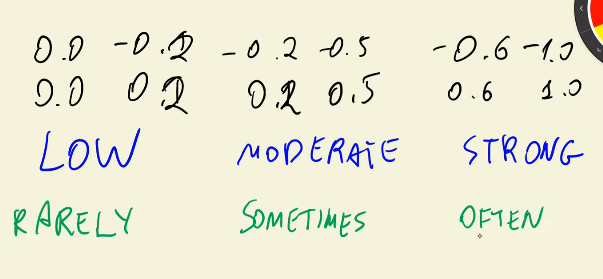

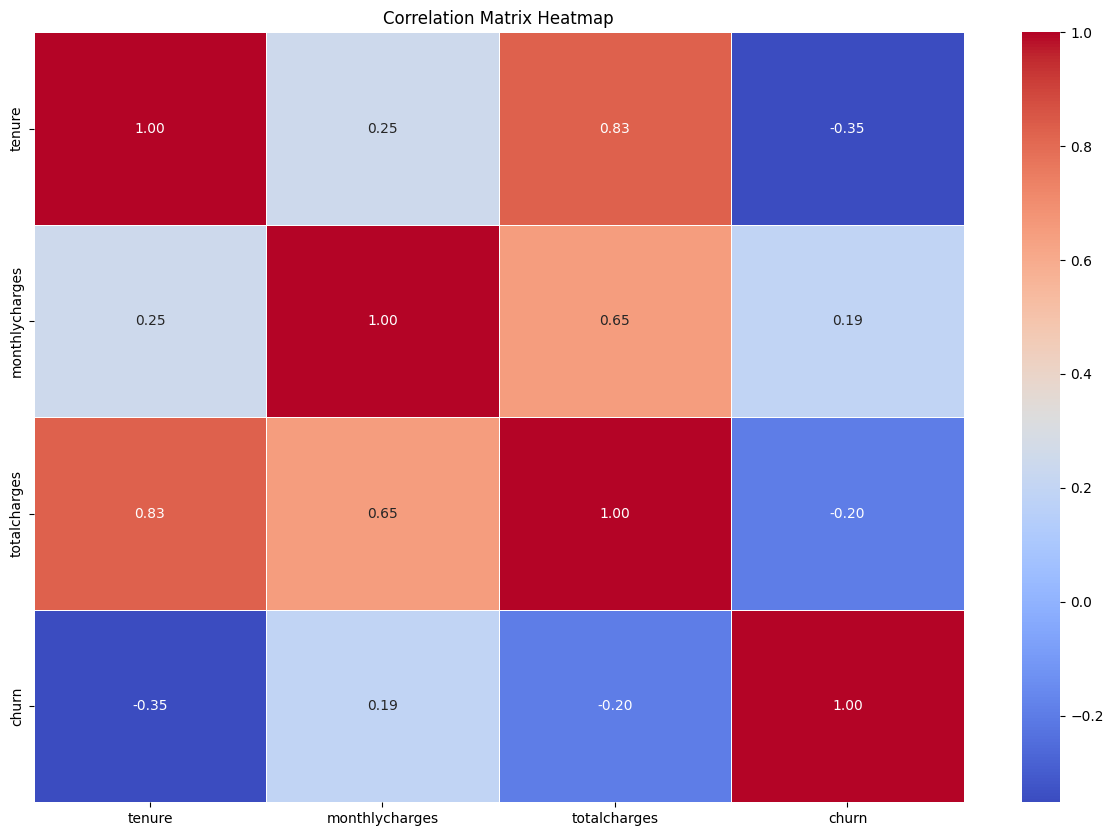

In [263]:
for_corr_num= ['tenure', 'monthlycharges', 'totalcharges','churn' ]

correlation_matrix = data[for_corr_num].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

### One-hot Encoding

In [264]:
from sklearn.feature_extraction import DictVectorizer

In [265]:
#İlk önce to_dict(orient='records') ne işe yaradığına bakalım..

train_dict = data[["gender"]].to_dict()
print(train_dict)

{'gender': {0: 'female', 1: 'male', 2: 'male', 3: 'male', 4: 'female', 5: 'female', 6: 'male', 7: 'female', 8: 'female', 9: 'male', 10: 'male', 11: 'male', 12: 'male', 13: 'male', 14: 'male', 15: 'female', 16: 'female', 17: 'male', 18: 'female', 19: 'female', 20: 'male', 21: 'male', 22: 'male', 23: 'female', 24: 'male', 25: 'female', 26: 'male', 27: 'male', 28: 'male', 29: 'female', 30: 'female', 31: 'male', 32: 'female', 33: 'male', 34: 'male', 35: 'female', 36: 'male', 37: 'female', 38: 'male', 39: 'female', 40: 'male', 41: 'female', 42: 'female', 43: 'female', 44: 'female', 45: 'female', 46: 'male', 47: 'female', 48: 'male', 49: 'female', 50: 'female', 51: 'female', 52: 'female', 53: 'female', 54: 'female', 55: 'male', 56: 'female', 57: 'male', 58: 'female', 59: 'female', 60: 'female', 61: 'male', 62: 'male', 63: 'female', 64: 'female', 65: 'female', 66: 'male', 67: 'female', 68: 'female', 69: 'male', 70: 'male', 71: 'female', 72: 'male', 73: 'male', 74: 'female', 75: 'female', 76: 

In [266]:
#ama bu to_dict(orient='records') parametresini eklediğimizde 

train_dict_orient = data[["gender"]].to_dict(orient='records')
train_dict_orient

[{'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'male'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': 'female'},
 {'gender': '

In [267]:
dv = DictVectorizer(sparse=False) #Sparse kullanmamızın temel nedeni olur da eksik 


#Tüm değişkenleri 
train_dict = X_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict) #Only Transform,NOT FIT_TRANSFORM


## LOGISTIC REGRESSION 

In [268]:
from sklearn.linear_model import LogisticRegression


model=LogisticRegression()

model.fit(X_train,y_train)

/home/yusuf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [269]:
model.intercept_ #

array([-0.13711412])

In [270]:
model.coef_[0] #coef --> Özelliklerin katsayısı

array([ 0.24123197, -0.15643413, -0.22138792,  0.03364553, -0.1702356 ,
        0.09473256, -0.10027053, -0.13105211, -0.01318951, -0.12340056,
       -0.30989561,  0.27357606, -0.10027053,  0.00562776, -0.2177317 ,
        0.02365696,  0.05748466,  0.09564994, -0.10027053, -0.13196949,
        0.2003342 , -0.10027053, -0.23665375, -0.28919259,  0.15260252,
       -0.07241112, -0.06417895, -0.08394398, -0.12344373,  0.27977786,
       -0.20898022,  0.02365696, -0.16024704,  0.17289978, -0.09581287,
       -0.10027053,  0.05949332, -0.08374561, -0.10027053,  0.04742606,
        0.23318035, -0.10027053, -0.2694999 , -0.06591295,  0.00032197])

* Kesim terimi (intercept), bağımsız değişkenin sıfır olduğu noktada doğruyla kesiştiği noktadır. Yani x=0 olduğunda, y değeri b0 kadar olur. Eğim katsayısı (slope) olan b1, bağımsız değişkenin bir birim artışıyla y değerinde ne kadar değişiklik olacağını belirtir.

* Bir model eğitildiğinde, bu katsayılar (kesim ve eğim) belirlenir ve model.intercept_ ile model.coef_ şeklinde erişilebilir. model.intercept_ kesim terimini, yani eğim değeri olmadan doğruyun y eksenini kestiği noktayı temsil eder.

In [271]:
#Tahmin etme
#0.5 ile kendi kendine treshold koyar ve gerekli tahmini yapar.

y_pred=model.predict(X_val)
y_pred=y_pred.reshape(-1,1)

In [272]:
#Soft tahminler, 

y_prob=model.predict_proba(X_val) #SOFT PREDICTS..


In [273]:
#Tahminlerimizin ortalaması
y_pred.mean()

0.21788502484031227

In [274]:
#Gerçek değerlerin ortalaması
y_val.mean()

churn    0.260468
dtype: float64

In [275]:
#Bunu bir DataFrame haline getirelim.

def PredictToDF(y_prob,y_pred,y_true):
    """
    y_prob: model.predict_proba(X_val)
    y_pred: y_pred=model.predict(X_val)
    y_val= y_true olması gerekir. 
    
    Lütfen sırayla giriniz.

    """

    y_prob = np.array(y_prob)
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)


    df=pd.DataFrame()
    df['probability0','probability1']=y_prob.tolist()
    df['prediction']=y_pred.tolist()
    df['actual']=y_true.tolist()



    return df

df_pred=PredictToDF(y_prob=y_prob,y_pred=y_pred,y_true=y_val)

df_pred

,"(probability0, probability1)",prediction,actual
0,"[0.9219673779407729, 0.07803262205922712]",[0],[0]
1,"[0.7201665233791624, 0.2798334766208376]",[0],[0]
2,"[0.9856526299830983, 0.014347370016901718]",[0],[0]
3,"[0.5470693072904793, 0.4529306927095207]",[0],[1]
4,"[0.9391993083198754, 0.06080069168012459]",[0],[0]
...,...,...,...
1404,"[0.9189110403264662, 0.08108895967353379]",[0],[0]
1405,"[0.9884107580334744, 0.011589241966525535]",[0],[0]
1406,"[0.8743674828883485, 0.12563251711165152]",[0],[0]
1407,"[0.8254619124254982, 0.17453808757450184]",[0],[0]


In [276]:
df_pred['correct']= df_pred.prediction == df_pred.actual

df_pred

,"(probability0, probability1)",prediction,actual,correct
0,"[0.9219673779407729, 0.07803262205922712]",[0],[0],True
1,"[0.7201665233791624, 0.2798334766208376]",[0],[0],True
2,"[0.9856526299830983, 0.014347370016901718]",[0],[0],True
3,"[0.5470693072904793, 0.4529306927095207]",[0],[1],False
4,"[0.9391993083198754, 0.06080069168012459]",[0],[0],True
...,...,...,...,...
1404,"[0.9189110403264662, 0.08108895967353379]",[0],[0],True
1405,"[0.9884107580334744, 0.011589241966525535]",[0],[0],True
1406,"[0.8743674828883485, 0.12563251711165152]",[0],[0],True
1407,"[0.8254619124254982, 0.17453808757450184]",[0],[0],True


In [277]:
#Kaç tanesi doğru

df_pred['correct'].value_counts()

#Output:
#True     1105
#False     304


correct
True     1105
False     304
Name: count, dtype: int64

# Modeli Kullanma


* Modeli test verisi üzerinde deneyeceğiz. Farklı parametrelerle deneyeceğiz ardında bunları değerlendirme metriklerinden geçireceğiz

In [278]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/home/yusuf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [279]:
dicts_test = X_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [280]:
#Tahmin Saf tahminler

y_pred = model2.predict_proba(X_test)[:, 1]

In [281]:
churn_decision = (y_pred >= 0.5)

In [282]:
churn_decision_df = pd.DataFrame({'churn': churn_decision})

In [283]:
#Genel sonuçları görme.. Genel doğru yapma ortalaması
y_test=y_test.reset_index(drop=True)

accuracy = (churn_decision_df['churn'] == y_test['churn']).mean()

In [284]:
accuracy

0.8140525195173882

## Değerlendirme Metrikleri 
 * y_pred'deki threshold değeri her zaman 0,5 olmalı mı ? 
 * bu threshold'ları karşılaştırma.
 * Karmaşıklık Matrisi
 * ROC eğrisi
 *Cross-Validation

In [285]:
thresholds=np.linspace(0,1,21)

thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [286]:
from sklearn.metrics import accuracy_score

#Tüm threshold'ların sonuçlarını bir listede tutalım.


scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)



0.00 0.260
0.05 0.371
0.10 0.422
0.15 0.472
0.20 0.500
0.25 0.517
0.30 0.536
0.35 0.556
0.40 0.581
0.45 0.600
0.50 0.626
0.55 0.643
0.60 0.663
0.65 0.668
0.70 0.694
0.75 0.715
0.80 0.732
0.85 0.737
0.90 0.740
0.95 0.740
1.00 0.740


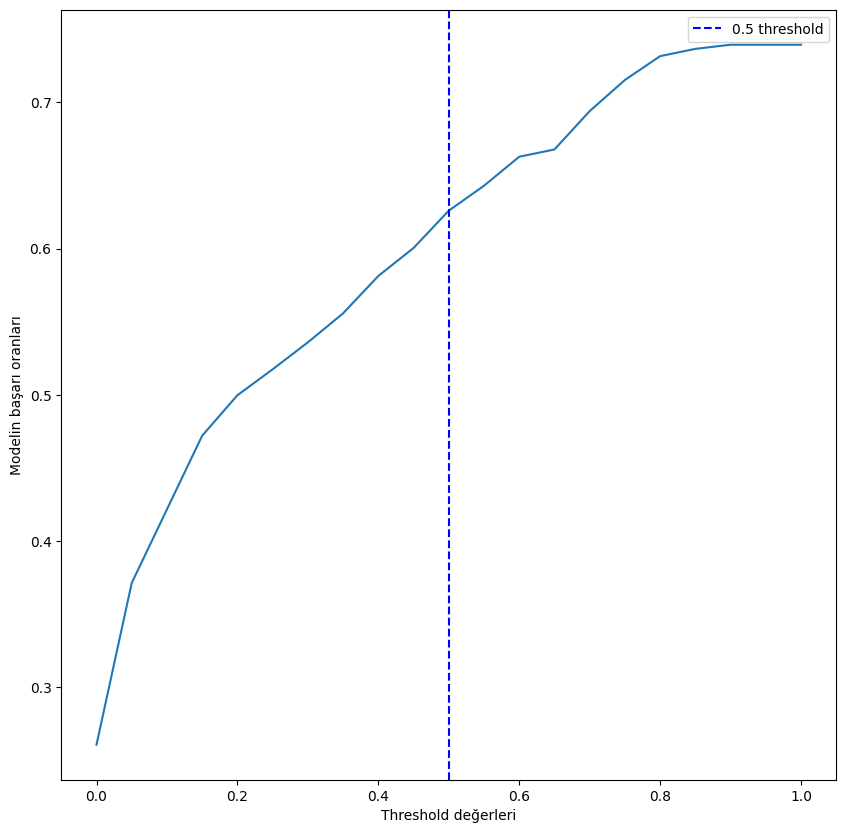

In [287]:
#Lineplot ile scores'ların gösterimi

plt.figure(figsize=(10,10))

plt.plot(thresholds,scores)

plt.xlabel("Threshold değerleri")
plt.ylabel("Modelin başarı oranları")
plt.axvline(x=np.mean(thresholds),c="b",ls='--',label="0.5 threshold")

plt.legend()
plt.show()

* Yorumlar: 

- Eğer 1.0 threshold'un daha iyi bir model olduğunu düşünüyorsanız, yanılıyorsunuz biz buna veri biliminde *dummy model* diyoruz. 1 yaparsak tüm test kümesini 0 (yani kalmaya meyilli müşteriler) olarak değerlendiririz.

- Ayrıca Accuracy çoğu durumda bize model'le ilgili iyi-kötü yorum yapmamız için yeterli değildir. Bunun için başka değerlendirme metriklerine bakacağız.
